In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글 설정

%matplotlib inline
import matplotlib.pyplot as plt
import sys

from matplotlib import font_manager, rc

if sys.platform == 'darwin' :
    path = '/Library/Fonts/AppleGothic.ttf'
elif sys.platform == 'win32' :
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~')
    
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
apt_a_2020 = pd.read_csv('2020_아파트.csv')
apt_a_2019 = pd.read_csv('2019_아파트.csv')
apt_a_2018 = pd.read_csv('2018_아파트.csv')
apt_a_2017 = pd.read_csv('2017_아파트.csv')
apt_a_2016 = pd.read_csv('2016_아파트.csv')
apt_a_2015 = pd.read_csv('2015_아파트.csv')
apt_a_2014 = pd.read_csv('2014_아파트.csv')
apt_a_2013 = pd.read_csv('2013_아파트.csv')

In [4]:
code_list = [('종로구',11110),('중구',11140),
('용산구',11170),
('성동구',11200),
('광진구',11215),
('동대문구',11230),
('중랑구',11260),
('성북구',11290),
('강북구',11305),
('도봉구',11320),
('노원구',11350),
('은평구',11380),
('서대문구',11410),
('마포구',11440),
('양천구',11470),
('강서구',11500),
('구로구',11530),
('금천구',11545),
('영등포구',11560),
('동작구',11590),
('관악구',11620),
('서초구',11650),
('강남구',11680),
('송파구',11710),
('강동구',11740)]

#### 2013년 9월 이전자료 삭제

In [5]:
apt_a_2013[apt_a_2013['tradeYMD']<20130900]

,Unnamed: 0,serialNm,tradeYMD,buildYear,gu,dong,aptName,jySize,floor,price,siguCode,dongCode,add1
0,0,11110-2204,20130102,2008,종로구,사직동,광화문풍림스페이스본(106동),153.42,9,115000,11110,11500,9-1
1,1,11110-2203,20130120,2008,종로구,사직동,광화문풍림스페이스본(101동~105동),131.44,6,119000,11110,11500,9
2,2,11110-205,20130104,2005,종로구,수송동,로얄팰리스스위트,39.67,8,33000,11110,12400,85
3,3,11110-205,20130122,2005,종로구,수송동,로얄팰리스스위트,40.07,15,32500,11110,12400,85
4,4,11110-205,20130124,2005,종로구,수송동,로얄팰리스스위트,39.67,15,34000,11110,12400,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41292,259,11740-2850,20130826,2009,강동구,강일동,강일리버파크2단지,84.53,5,38500,11740,11000,668
41293,260,11740-2852,20130826,2009,강동구,강일동,강일리버파크3단지,84.83,7,41300,11740,11000,674
41294,261,11740-2854,20130827,2009,강동구,강일동,강일리버파크8단지,84.83,5,41200,11740,11000,701
41295,262,11740-2852,20130831,2009,강동구,강일동,강일리버파크3단지,84.53,11,38000,11740,11000,674


In [6]:
apt_a_2013 = apt_a_2013.drop(apt_a_2013.index[0:41297])

In [7]:
apt_a_2013.head()

,Unnamed: 0,serialNm,tradeYMD,buildYear,gu,dong,aptName,jySize,floor,price,siguCode,dongCode,add1
41297,0,11110-2203,20130905,2008,종로구,사직동,광화문풍림스페이스본(101동~105동),159.01,3,106500,11110,11500,9
41298,1,11110-2203,20130924,2008,종로구,사직동,광화문풍림스페이스본(101동~105동),108.07,6,78000,11110,11500,9
41299,2,11110-2203,20130930,2008,종로구,사직동,광화문풍림스페이스본(101동~105동),94.28,8,69500,11110,11500,9
41300,3,11110-2203,20130930,2008,종로구,사직동,광화문풍림스페이스본(101동~105동),97.61,11,72500,11110,11500,9
41301,4,11110-13,20130926,1983,종로구,당주동,세종,104.73,4,53000,11110,11700,100


#### 합치기

In [8]:
apt_total = pd.concat([apt_a_2020,apt_a_2019,apt_a_2018,apt_a_2017,apt_a_2016,apt_a_2015,apt_a_2014,apt_a_2013])

In [9]:
apt_total = apt_total.sort_values('tradeYMD')
apt_total = apt_total.reset_index(drop=True)

In [10]:
apt_total.head()

,Unnamed: 0,serialNm,tradeYMD,buildYear,gu,dong,aptName,jySize,floor,price,siguCode,dongCode,add1
0,363,11710-6241,20130901,2008,송파구,장지동,송파파인타운3단지,84.980,11,54000,11710,10900,849
1,336,11350-202,20130901,1988,노원구,상계동,보람1단지,44.330,9,16400,11350,10500,639
2,335,11350-53,20130901,1999,노원구,상계동,상계현대3차,84.960,7,30900,11350,10500,1063
3,411,11290-3794,20130901,2010,성북구,하월곡동,꿈의숲푸르지오,59.650,13,31300,11290,13600,228
4,410,11290-88,20130901,2003,성북구,하월곡동,월곡두산위브,84.766,2,34800,11290,13600,222


In [11]:
apt_total['pricepersize']=(apt_total['price']/apt_total['jySize']).round(2)

In [12]:
apt_total[apt_total['pricepersize']>5000]

,Unnamed: 0,serialNm,tradeYMD,buildYear,gu,dong,aptName,jySize,floor,price,siguCode,dongCode,add1,pricepersize
542435,63,11680-573,20190604,1982,강남구,개포동,개포주공 1단지,42.55,5,220000,11680,10300,141,5170.39
548278,137,11680-573,20190629,1982,강남구,개포동,개포주공 1단지,35.87,5,199000,11680,10300,141,5547.81
550631,94,11680-573,20190706,1982,강남구,개포동,개포주공 1단지,42.55,4,219500,11680,10300,141,5158.64
553028,117,11680-573,20190715,1982,강남구,개포동,개포주공 1단지,35.64,4,187500,11680,10300,141,5260.94
559491,65,11680-573,20190810,1982,강남구,개포동,개포주공 1단지,35.44,2,200000,11680,10300,141,5643.34
563970,104,11680-573,20190831,1982,강남구,개포동,개포주공 1단지,61.57,2,310000,11680,10300,141,5034.92
565699,95,11680-573,20190907,1982,강남구,개포동,개포주공 1단지,41.98,4,225000,11680,10300,141,5359.70
565702,93,11680-573,20190907,1982,강남구,개포동,개포주공 1단지,56.57,2,305000,11680,10300,141,5391.55
565704,91,11680-573,20190907,1982,강남구,개포동,개포주공 1단지,35.64,1,210000,11680,10300,141,5892.26
566330,105,11680-573,20190911,1982,강남구,개포동,개포주공 1단지,50.38,2,280000,11680,10300,141,5557.76


In [13]:
apt_time = apt_total[['tradeYMD','gu','siguCode','pricepersize']]
gu = apt_total.siguCode.unique()

In [14]:
gu_name=apt_total.gu.unique()
gu_name

array(['송파구', '노원구', '성북구', '영등포구', '강서구', '강북구', '동대문구', '마포구', '구로구',
       '관악구', '양천구', '도봉구', '서초구', '은평구', '성동구', '동작구', '중구', '종로구',
       '중랑구', '서대문구', '강남구', '금천구', '용산구', '광진구', '강동구'], dtype=object)

In [15]:
apt_total

,Unnamed: 0,serialNm,tradeYMD,buildYear,gu,dong,aptName,jySize,floor,price,siguCode,dongCode,add1,pricepersize
0,363,11710-6241,20130901,2008,송파구,장지동,송파파인타운3단지,84.980,11,54000,11710,10900,849,635.44
1,336,11350-202,20130901,1988,노원구,상계동,보람1단지,44.330,9,16400,11350,10500,639,369.95
2,335,11350-53,20130901,1999,노원구,상계동,상계현대3차,84.960,7,30900,11350,10500,1063,363.70
3,411,11290-3794,20130901,2010,성북구,하월곡동,꿈의숲푸르지오,59.650,13,31300,11290,13600,228,524.73
4,410,11290-88,20130901,2003,성북구,하월곡동,월곡두산위브,84.766,2,34800,11290,13600,222,410.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661792,180,11590-76,20200831,1988,동작구,신대방동,우성1,66.690,13,83500,11590,10900,565,1252.06
661793,23,11260-30,20200831,2002,중랑구,면목동,늘푸른동아,84.970,11,69500,11260,10100,715,817.94
661794,22,11260-21,20200831,1999,중랑구,면목동,일신강변,84.740,4,52000,11260,10100,1520,613.64
661795,238,11350-1831,20200831,2009,노원구,상계동,노원IPARK,145.580,9,73000,11350,10500,1318,501.44


In [17]:
df = apt_time[apt_time['siguCode']==11110].copy()
df['datetime'] = df['tradeYMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 
df.set_index(df['datetime'], inplace=True)
df = df.drop(['datetime','gu','siguCode','tradeYMD'], 1)
weekly_df1 = df.resample('W-Mon').mean()
dates_week=weekly_df1.index

In [18]:
dates_week

DatetimeIndex(['2013-09-02', '2013-09-09', '2013-09-16', '2013-09-23',
               '2013-09-30', '2013-10-07', '2013-10-14', '2013-10-21',
               '2013-10-28', '2013-11-04',
               ...
               '2020-06-29', '2020-07-06', '2020-07-13', '2020-07-20',
               '2020-07-27', '2020-08-03', '2020-08-10', '2020-08-17',
               '2020-08-24', '2020-08-31'],
              dtype='datetime64[ns]', name='datetime', length=366, freq='W-MON')

In [19]:
weekly_df=np.zeros(shape=(366,1))
for i in gu:
    df = apt_time[apt_time['siguCode']==i].copy()
    df['datetime'] = df['tradeYMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 
    df.set_index(df['datetime'], inplace=True)
    df = df.drop(['datetime','gu','siguCode','tradeYMD'], 1)
    weekly_df1 = df.resample('W-Mon').mean().to_numpy()
    weekly_df=np.concatenate((weekly_df, weekly_df1), axis=1)
    print(1)

weekly_df = weekly_df[:,1:]

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [20]:
df_week=pd.DataFrame(weekly_df)

In [21]:
gu

array([11710, 11350, 11290, 11560, 11500, 11305, 11230, 11440, 11530,
       11620, 11470, 11320, 11650, 11380, 11200, 11590, 11140, 11110,
       11260, 11410, 11680, 11545, 11170, 11215, 11740], dtype=int64)

In [22]:
df_week

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,780.654706,401.134118,458.346400,523.543571,452.855000,413.722000,441.919412,608.802333,420.244643,476.157273,...,602.248125,528.838750,453.410000,413.993333,425.136429,1005.684583,331.693750,701.303333,658.362222,625.370455
1,866.047234,404.621803,457.442426,517.538523,455.188852,391.307907,439.516098,606.946481,507.006571,464.010656,...,556.420938,596.425217,578.346250,397.074375,438.275192,978.380000,351.753659,736.027037,606.172308,588.451827
2,848.035246,411.001261,461.377958,491.309241,449.278819,410.841636,436.870862,607.299483,428.887431,461.362459,...,604.092188,601.642174,511.676875,422.170139,454.465000,1020.212913,343.949677,706.797619,623.553750,580.274381
3,847.462432,400.582027,460.594030,515.315806,439.625405,423.865333,471.555882,617.955217,429.182955,447.192857,...,600.756579,733.848571,669.961429,394.733182,446.097692,857.487273,374.844286,814.763333,597.270000,593.543125
4,780.617244,413.225513,459.750827,529.113409,465.185804,428.735333,442.254247,615.945000,441.309896,460.923014,...,595.274935,632.758966,577.491905,403.894615,477.660000,1054.125739,370.954375,689.763714,635.494375,571.899362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1477.073594,896.548051,1023.963649,1224.350167,975.105043,764.540556,1152.424762,1360.403095,761.231077,931.334848,...,1256.016818,1114.255556,1451.702222,790.383784,1128.536545,2022.250462,734.338800,1427.768846,1350.460769,1277.476957
362,1451.926066,879.162828,952.411400,1173.221739,974.840256,836.028889,971.557385,1457.290429,813.735283,907.768387,...,1359.967736,1097.217143,1315.755455,805.407297,1137.167660,2148.570526,847.079474,1629.152414,1439.655000,1243.924247
363,1610.573750,906.595859,1016.563966,1163.141364,1050.293051,738.923636,1187.320612,1365.891500,908.968226,898.065238,...,1269.071818,1128.938947,1341.828182,845.979000,1096.038261,2307.309636,804.366667,1677.662941,1563.497647,1255.724487
364,1654.071429,954.608814,1039.154694,1201.734333,998.034194,879.698947,1112.840800,1311.617391,829.043182,950.170500,...,1170.464706,1330.566000,1527.680000,857.408400,981.060000,2140.510556,677.518571,1722.278235,1126.806667,1175.919130


In [23]:
df_week.index=dates_week

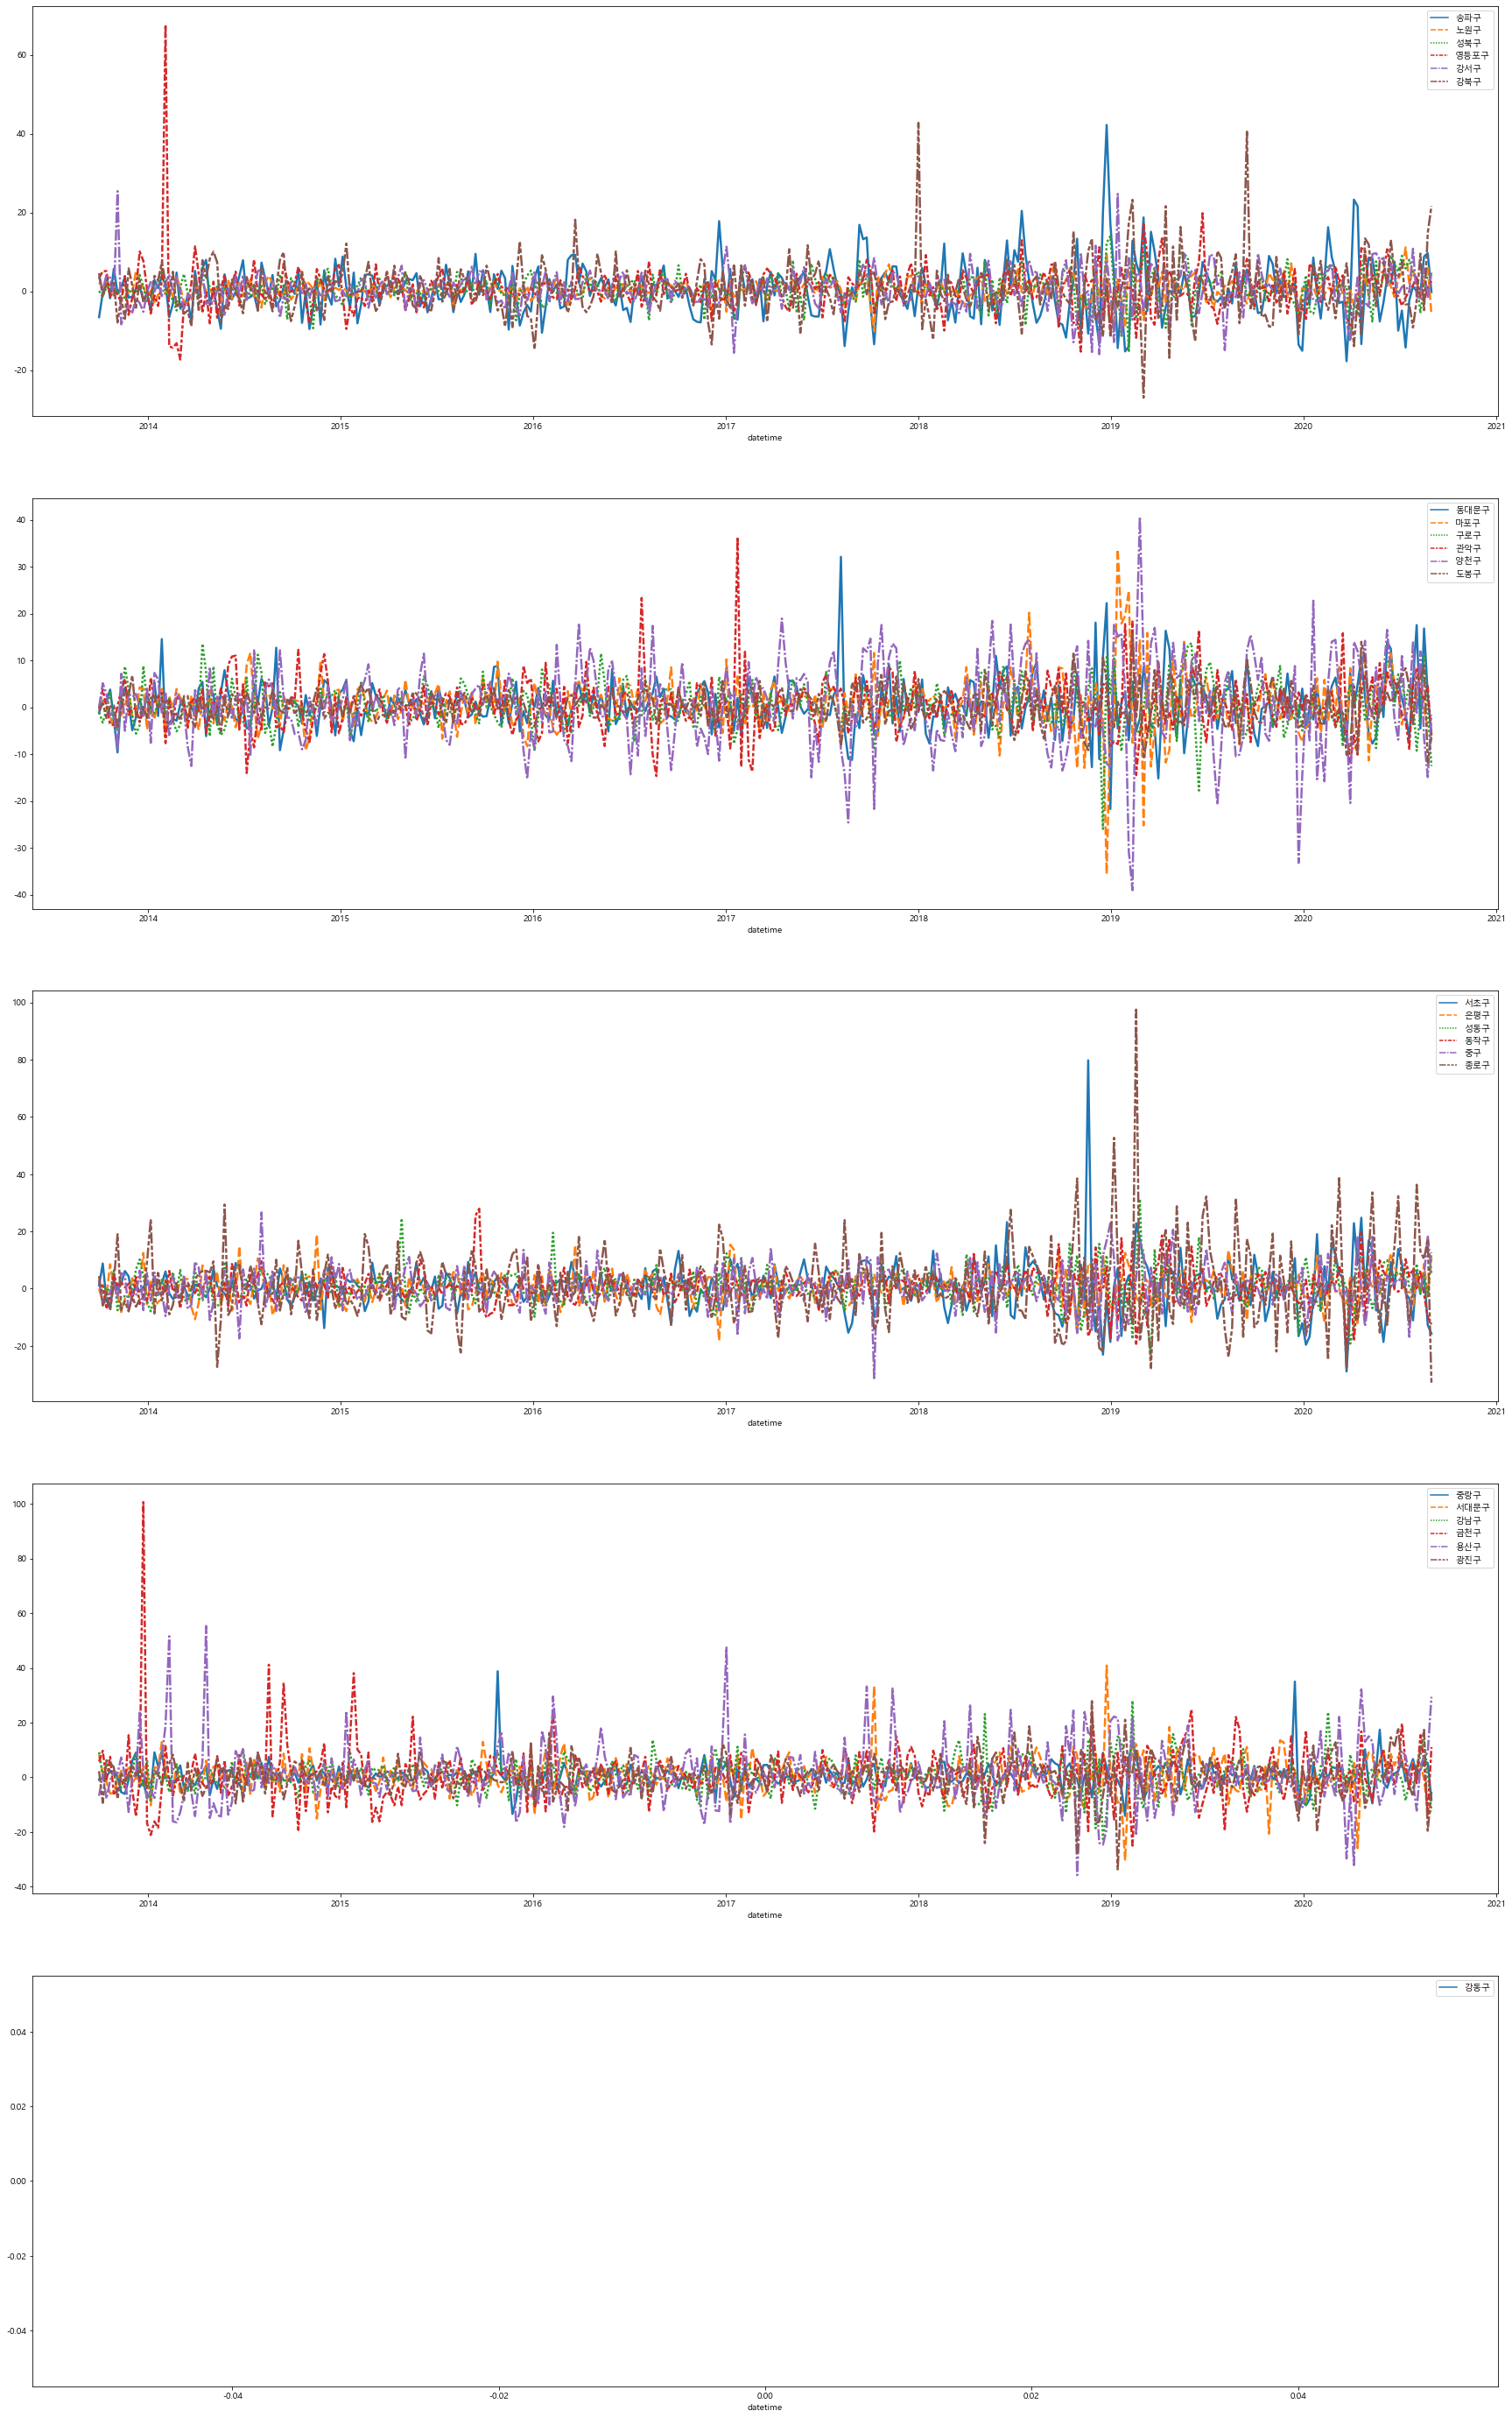

In [24]:
a = df_week.iloc[0:4].mean().to_numpy()[np.newaxis]
pd.DataFrame(a)
df_week_4=pd.DataFrame(index=range(0,0))
for i in range(362):
    a = df_week.iloc[i:i+4].mean().to_numpy()[np.newaxis]
    b = pd.DataFrame(a)
    df_week_4 = df_week_4.append(b)
df_week_4.index = dates_week[4:]
df_week_4_ud = (df_week.iloc[4:]/df_week_4-1)*100


fig, ax = plt.subplots(5,figsize=[30,50])

dates = df_week_4_ud.index
for i in range(4):
    k=i*6
    j = k+6
    value = df_week_4_ud.iloc[:,k:j].to_numpy()
    data = pd.DataFrame(value,dates,columns=gu_name[k:j])
    sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[i])
    
    
value = df_week_4_ud.iloc[:,24]

data = pd.DataFrame(value,dates,columns=gu_name[24:])

sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[4])

6 0 0
<class 'numpy.ndarray'>
12 6 1
<class 'numpy.ndarray'>
18 12 2
<class 'numpy.ndarray'>
24 18 3
<class 'numpy.ndarray'>
[('종로구', 11110), ('중구', 11140), ('용산구', 11170), ('성동구', 11200), ('광진구', 11215), ('동대문구', 11230), ('중랑구', 11260), ('성북구', 11290), ('강북구', 11305), ('도봉구', 11320), ('노원구', 11350), ('은평구', 11380), ('서대문구', 11410), ('마포구', 11440), ('양천구', 11470), ('강서구', 11500), ('구로구', 11530), ('금천구', 11545), ('영등포구', 11560), ('동작구', 11590), ('관악구', 11620), ('서초구', 11650), ('강남구', 11680), ('송파구', 11710), ('강동구', 11740)]


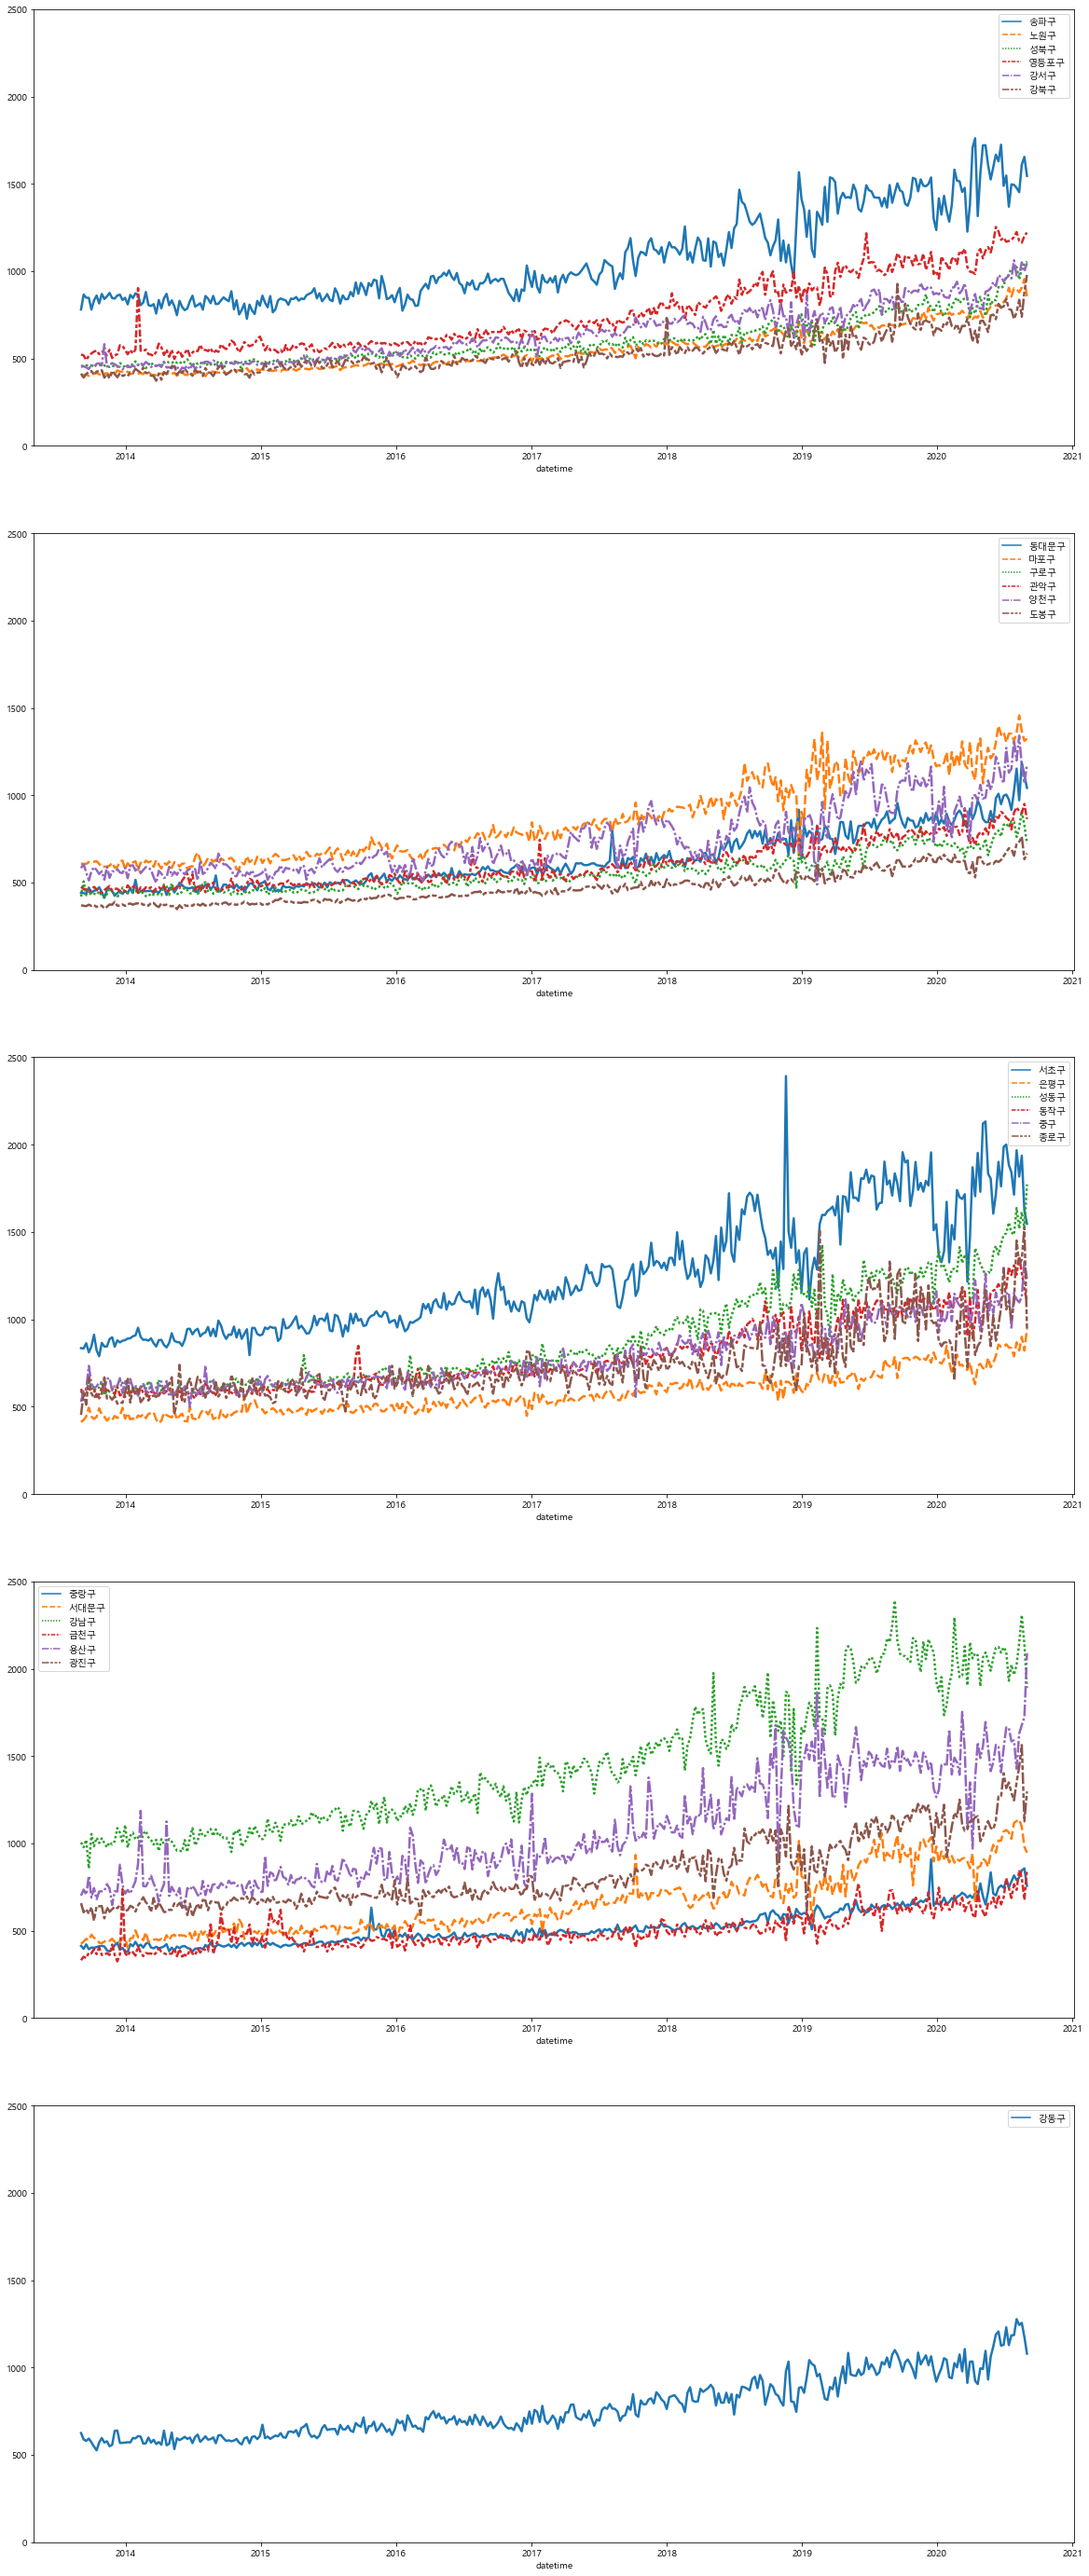

In [25]:


fig, ax = plt.subplots(5,figsize=[20,50])

dates = dates_week
for i in range(4):
    k=i*6
    j = k+6

    print(j,k,i)
    value = weekly_df[:,k:j]
    print(type(value))
    
    data = pd.DataFrame(value,dates,columns=gu_name[k:j])
    
    sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[i]).set(ylim=(0, 2500))
    
    
value = weekly_df[:,24]

data = pd.DataFrame(value,dates,columns=gu_name[24:])

sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[4]).set(ylim=(0, 2500))
print(code_list)

In [26]:
df = apt_time[apt_time['siguCode']==11110].copy()
df['datetime'] = df['tradeYMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 
df.set_index(df['datetime'], inplace=True)
df = df.drop(['datetime','gu','siguCode','tradeYMD'], 1)
monthly_df1 = df.resample('M').mean()
dates_month=monthly_df1.index

In [27]:
monthly_df=np.zeros(shape=(84,1))
for i in gu:
    df = apt_time[apt_time['siguCode']==i].copy()
    df['datetime'] = df['tradeYMD'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')) 
    df.set_index(df['datetime'], inplace=True)
    df = df.drop(['datetime','gu','siguCode','tradeYMD'], 1)
    monthly_df1 = df.resample('M').mean().to_numpy()
    monthly_df=np.concatenate((monthly_df, monthly_df1), axis=1)
    
monthly_df=monthly_df[:,1:]

6 0 0
12 6 1
18 12 2
24 18 3


[(0.0, 2500.0)]

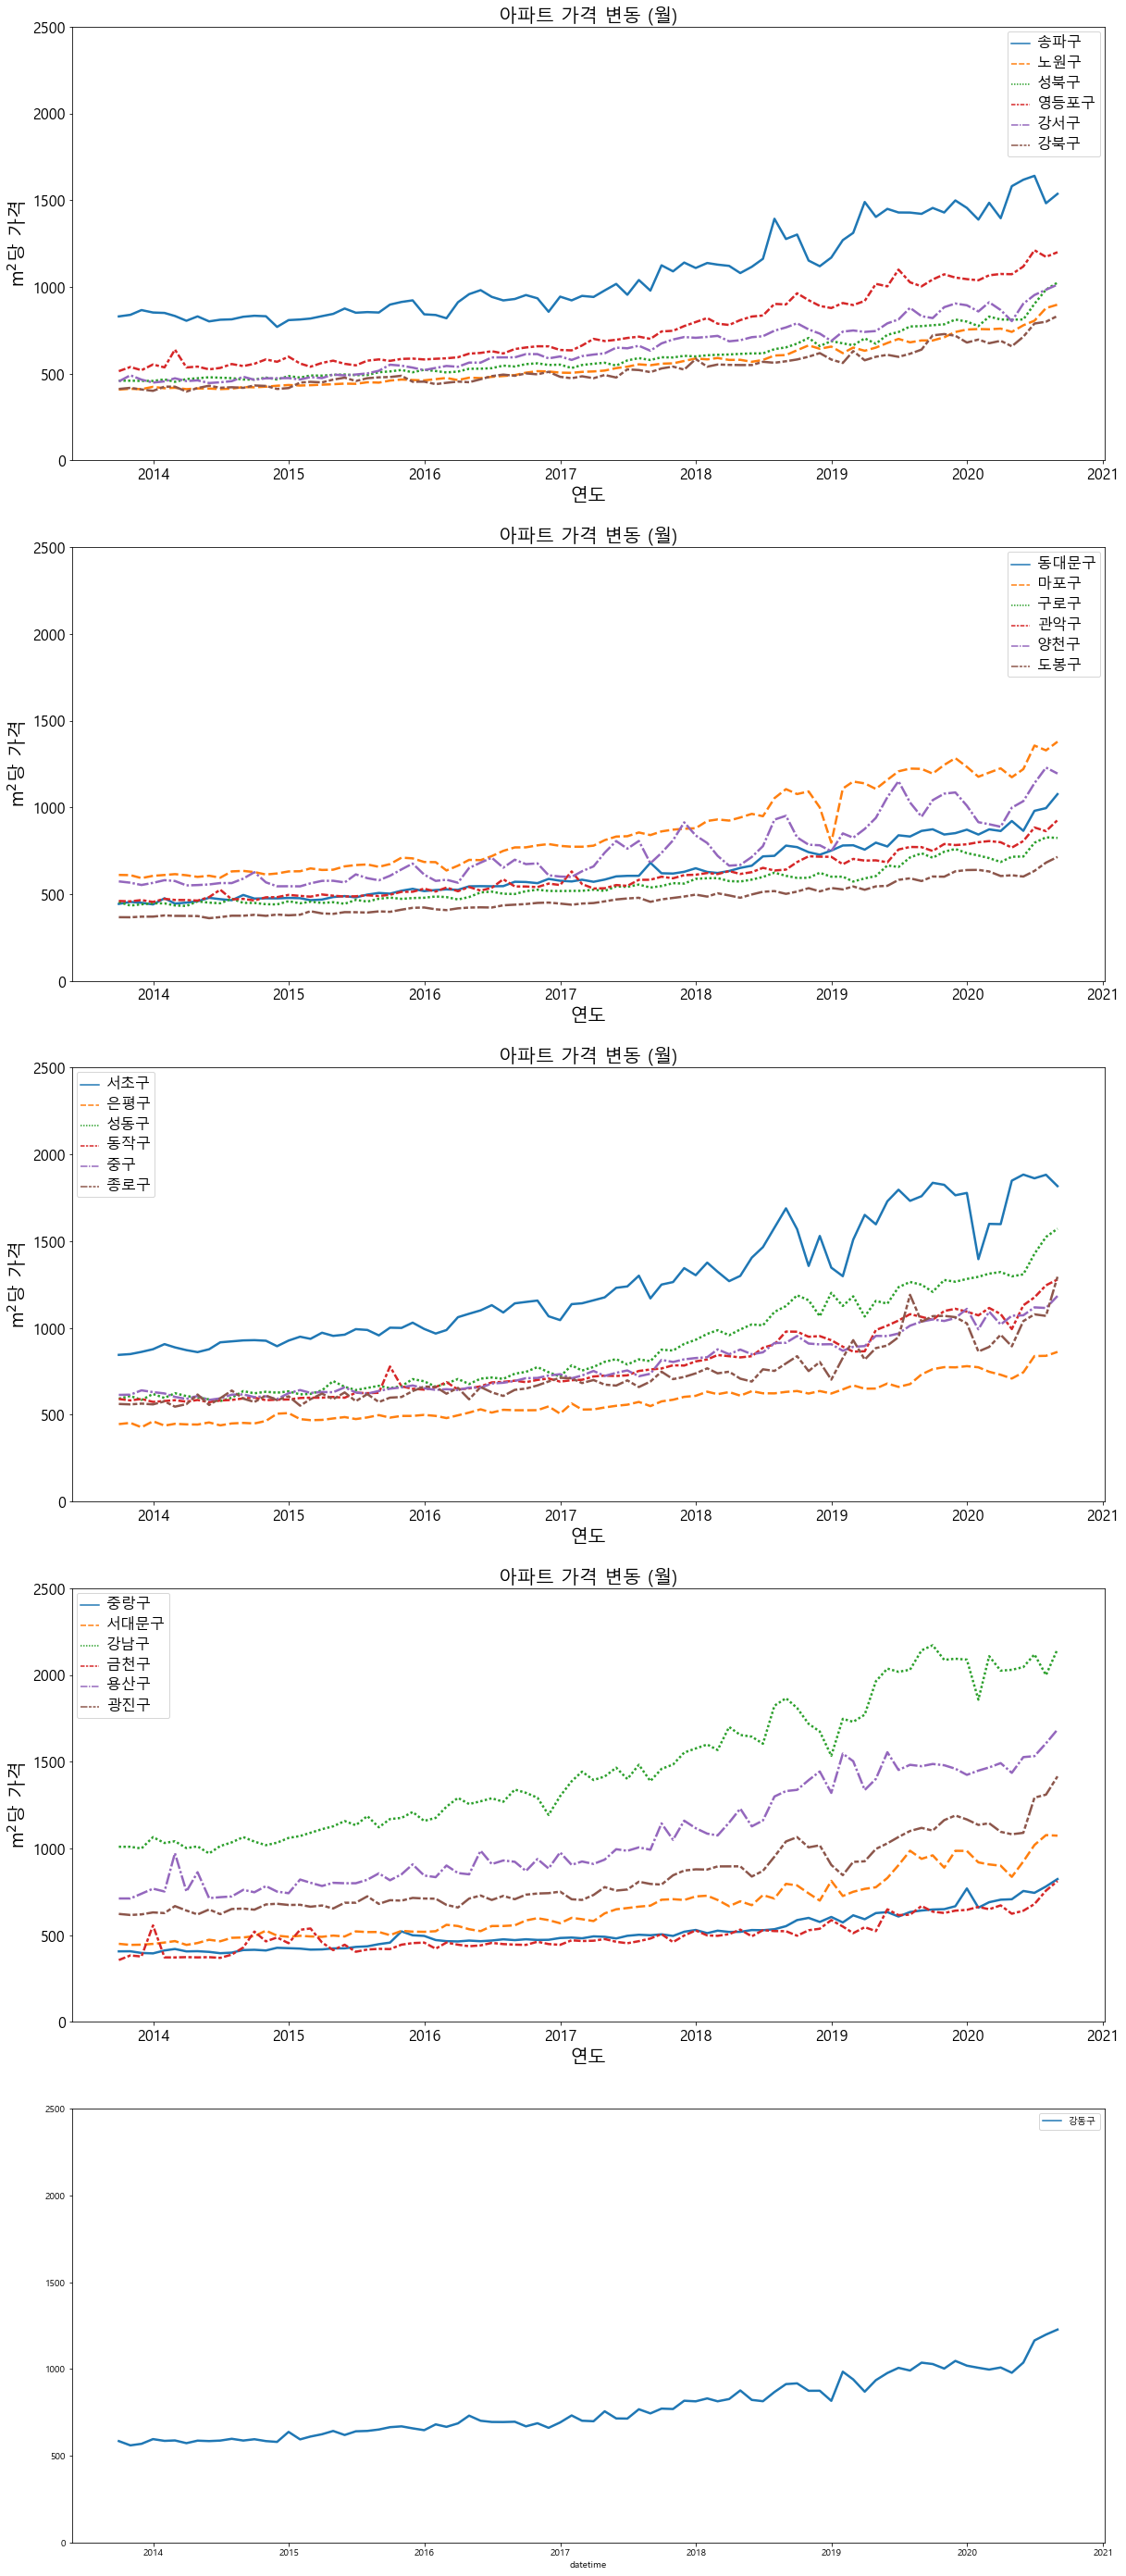

In [54]:

fig, ax = plt.subplots(5,figsize=[20,50])

dates = dates_month
for i in range(4):
    k=i*6
    j = k+6

    print(j,k,i)
    value = monthly_df[:,k:j]

    data = pd.DataFrame(value,dates,columns=gu_name[k:j])
    
    b = sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[i])
    b.set(ylim=(0, 2500))
    b.set_title('아파트 가격 변동 (월)',fontsize=20)
    b.set_xlabel('연도',fontsize=20)
    b.set_ylabel('m$^2$당 가격',fontsize=20)
    b.tick_params(labelsize=16)
    plt.setp(b.get_legend().get_texts(), fontsize='16')
    plt.savefig("output"+str(i)+".png")
    
value = monthly_df[:,24]

data = pd.DataFrame(value,dates,columns=gu_name[24:])


sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax[4]).set(ylim=(0, 2500))

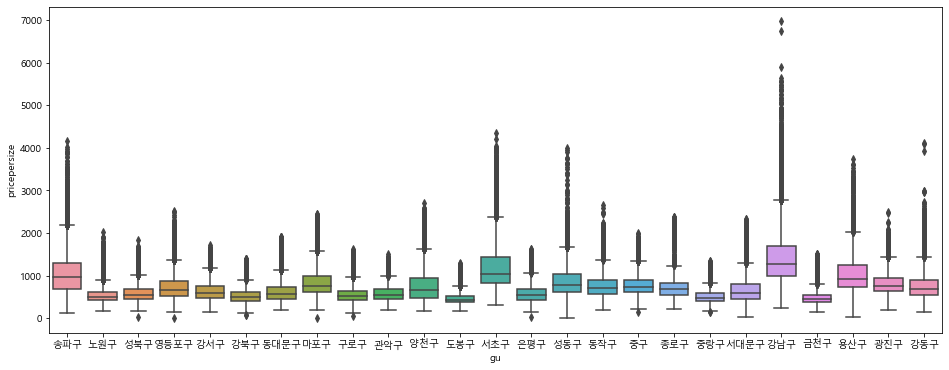

In [29]:
df = pd.DataFrame(apt_total[['gu','pricepersize']])
plt.figure(figsize=(16, 6))
sns.boxplot(x="gu", y="pricepersize", data=df)

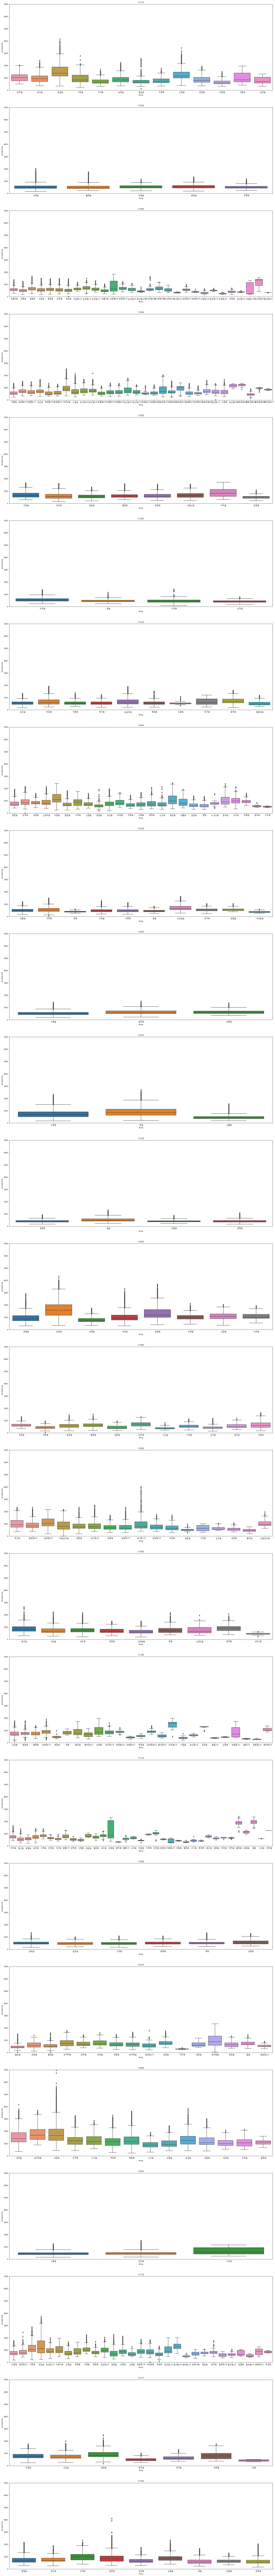

In [30]:
fig, ax = plt.subplots(25,figsize=[25,250])
j=0
for i in gu:
    df = apt_total[apt_total['siguCode']==i]
    graph = sns.boxplot(x="dong", y="pricepersize", data=df,ax=ax[j])
    graph.set(ylim=(0,7000))
    graph.set_title(i)
    j+=1
